# <span style='font-family:Inter Black'> Kelly Criterion

## <span style='font-family:Inter'> Theory

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

from StatsAndProbability.KellyCriterion.kelly_criterion import KellyCriterion

C:\Users\ilsup\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Consider a fair bet, quoted at 2 (50/50 chance). Let's first assume we know with certainty the winner. How much would
he bet? Probably all he had since you would win with certainty. In this case The capital would grow exponentially and after N bets he would have $2^N$ times the original bankroll. This exponential growth of capital is not uncommon in economics. In fact, if the binary digits in the above channel were arriving at the rate of one per week, the sequence of bets would have the value of an investment paying 100% interest per week compounded weekly. We will make use of a quantity $G$ called the exponential rate of growth of the gambler’s capital, where

$$G = \lim_{N \to +\infty} \frac{1}{N} \log \frac{V_N}{V_0}$$

That means

$$V_N = V_0 e^{G N}$$

In the previous example, $G=1$. In a discrete framework, 

$$V_N = V_0 (1+r)^N$$

and so:

$$r + 1 = \frac{V_N}{V_0}^{\frac{1}{N}}$$

**By setting $G = \log(1+r)$ we obtain the first equation**. Consider the case now of a noisy binary channel, where each transmitted symbol has probability, $p$ of correct transmission. Now the gambler could still bet his entire capital each time, and, in fact, this would maximize the expected value of his capital, which in this case would be given by

$$E(V_N)  = (2p)^N V_0$$

(**this is true only if $p > 0.5$**)


This would be little comfort, however, since when N was large he would probably be broke and, in fact, would be broke with probability one if he continued indefinitely. Let us, instead, assume that he bets a fraction $l$ of his capital each time. Then

$$V_N = (1 + l)^W (1 − l)^L V_0$$

<div class="alert alert-info">
To reach to the previous conclusion that the expected value of the bet is reached as betting the full wealth let's take the expected value of that quantity <br><br>
    
$$
E(V_N) = E((1 + l)^W (1 − l)^L V_0)\\
E(V_N) = (1 + l)^{Np} (1 − l)^{N(1-p)} V_0\\
$$


</div>

where $W$ and $L$ are the number of wins and losses in the $N$ bets. Then

$$\begin{align} G &= \lim_{N \to +\infty} \frac{1}{N} \log \frac{(1 + l)^W (1 − l)^L V_0}{V_0} \\
&= \lim_{N \to +\infty} \left[ \frac{W}{N} \log(1 + l) + \frac{L}{N} \log(1 - l) \right] \\
&= p \log(1 + l) + (1-p) \log(1 - l) \end{align}$$

Where $p$ is the probability of winning. Maximizing $G$ means deriving last equation and set it equal to zero.

$$\frac{\partial G}{\partial l} = \frac{p}{1+l} - \frac{1-p}{1-l}$$

which is convex since

$$\frac{\partial^2 G}{\partial l^2} = -\frac{p}{(1+l)^2} - \frac{1-p}{(1-l)^2}$$

is always negative. Setting the derivative equal to zero yields:

$$1+l = 2p\\
$$

In [2]:
bet_portions = np.arange(0.01, 1, 0.001) # waged fraction
correct_transmission_prob = np.arange(0.5, 1.05, 0.05) # chance of correct communication

In [3]:
q = 0.8
g_dict = {}
for q in correct_transmission_prob:
    q = round(q, 2)
    g_dict_by_prob = {}
    for l in bet_portions:
        g = q * np.log(1 + l) + (1-q) * np.log(1-l)
        g_dict_by_prob[l] = g
    
    g_dict[q] = g_dict_by_prob


In [4]:
log_G = pd.DataFrame(g_dict)  # logaritmic growth
G = (np.exp(log_G) - 1)  # growth

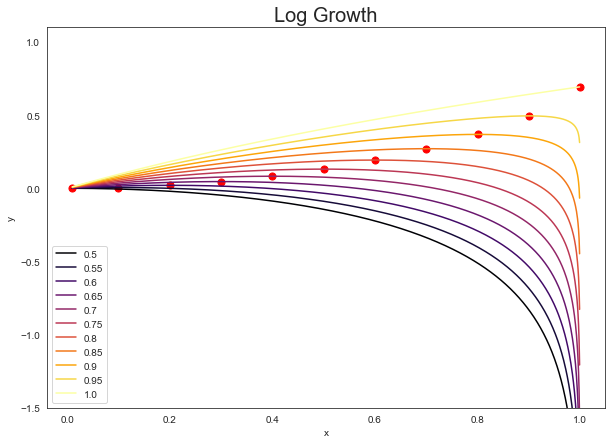

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
log_G.plot(ax=ax,  cmap=plt.get_cmap('inferno'))
max_g = log_G.max(axis=0)
max_g.index = log_G.idxmax(axis=0, skipna=True).values
max_g = max_g.reset_index()
max_g.columns =['x', 'y']
max_g.plot(kind ='scatter', x='x', y='y', ax=ax, color = 'red', s=50)
ax.set_ylim(-1.5, 1.1)
ax.set_title('Log Growth', fontsize=20)
plt.show()

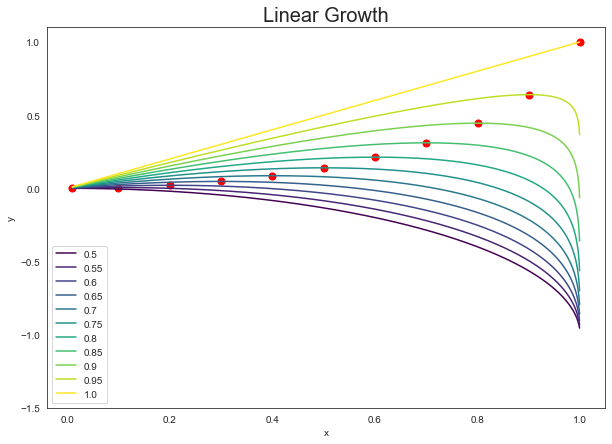

In [6]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
G.plot(ax=ax, cmap=plt.get_cmap('viridis'))
max_g = G.max(axis=0)
max_g.index = G.idxmax(axis=0, skipna=True).values
max_g = max_g.reset_index()
max_g.columns =['x', 'y']
max_g.plot(kind ='scatter', x='x', y='y', ax=ax, color = 'red', s=50)
ax.set_title('Linear Growth', fontsize=20)
ax.set_ylim(-1.5, 1.1)
plt.show()

## <span style='font-family:Inter'> Generalizations
    
- In the base case, i.e. doubling the wagered amount with probability $p$ or losing everything with probability $q = 1 - p$, the optimal fraction of wealth wagered is: 

    $$f^* = p - q$$  


- Winning $b$ units per unit of wagered amount with probability $p$ or losing everything with probability $q = 1 - p$, the optimal fraction of wealth wagered is: 

    $$f^* = \frac{bp - q}{b}$$  
    
    Of course, if $b=2$, we go back to the base case.

- Winning $b$ units per unit of wagered amount with probability $p$ or losing $a$ units per unit of wagered amount with probability $q$, then, if the expectation value of the bet $bp-aq > 0$, the optimal fraction of wealth wagered is: 

    $$f^* = \frac{bp - aq}{ab}$$  
    
    Of course, if $b=2$, we go back to the base case.

   

In [7]:
print('Optimal fraction bet: ', round(KellyCriterion(p=0.6).get_optimal_f(), 3))
print('Optimal fraction bet: ', round(KellyCriterion(p=0.6, b=1.2).get_optimal_f(), 3))
print('Optimal fraction bet: ', round(KellyCriterion(p=0.5, b=0.5, a=0.4).get_optimal_f(), 3))  # Ergodicity Case

Optimal fraction bet:  0.2
Optimal fraction bet:  0.267
Optimal fraction bet:  0.25


In [8]:
kc = KellyCriterion(p=0.5, b=0.5, a=0.4)

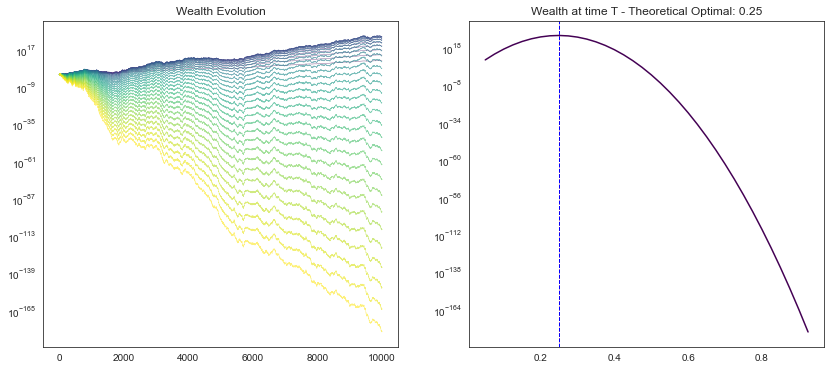

In [9]:
W, fig = kc.W_as_f_changes(graph=True)

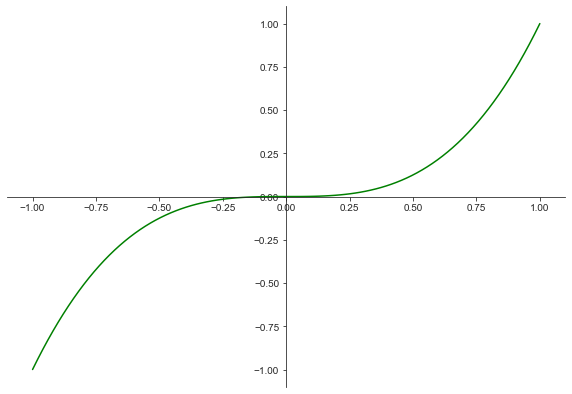

In [10]:

# 100 linearly spaced numbers
x = np.linspace(-1,1,100)

# the function, which is y = x^3 here
y = x**3

# setting the axes at the centre
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

In [11]:
def norm_integral(f, mean, std):
    val, er = quad(lambda s: np.log(1 + f * s) * norm.pdf(s, mean, std), 
                               mean - 3 * std, 
                               mean + 3 * std)
    return -val

def norm_dev_integral(f, mean, std):
    val, er = quad(lambda s: (s / (1 + f * s)) * norm.pdf(s, mean, std), m-3*std, mean+3*std)
    return val

def get_kelly_share(data):
    solution = minimize_scalar(norm_integral, 
                        args=(data['mean'], data['std']), 
                        bounds=[0, 2], 
                        method='bounded') 
    return solution.x


annual_returns = sp500.resample('A').last().pct_change().dropna().to_frame('sp500')
return_params = annual_returns.sp500.rolling(25).agg(['mean', 'std']).dropna()

return_ci = (return_params[['mean']]
                .assign(lower=return_params['mean'].sub(return_params['std'].mul(2)))
                .assign(upper=return_params['mean'].add(return_params['std'].mul(2))))

annual_returns['f'] = return_params.apply(get_kelly_share, axis=1)

return_params.plot(subplots=True, lw=2, figsize=(14, 8));

NameError: name 'sp500' is not defined

### Compute Kelly Fraction

In [14]:
from scipy.optimize import minimize_scalar
from scipy.optimize import newton

m = .058
s = .216

# Option 1: minimize the expectation integral
sol = minimize_scalar(norm_integral, args=(m, s), bounds=[0., 2.], method='bounded')
print('Optimal Kelly fraction: {:.4f}'.format(sol.x))


# Option 2: take the derivative of the expectation and make it null
x0 = newton(norm_dev_integral, .1, args=(m, s))
print('Optimal Kelly fraction: {:.4f}'.format(x0))

NameError: name 'quad' is not defined

## <span style='font-family:Inter'> Practice </span>

Let's follow the *Practical Implementation of the Kelly Criterion: Optimal Growth Rate, Number of Trades, and Rebalancing Frequency for Equity Portfolios* in [references](references)

$$\text{Kelly} = \frac{\text{Edge}}{\text{Odds}}$$

$$\text{Kelly} = \frac{bp - q}{b}$$

<a id='references'></a>
## <span style='font-family:Inter Black'> References </span>

- [**Here**](http://www.princeton.edu/~wbialek/rome/refs/kelly_56.pdf) Kelly's paper
- [**Thorp Paper**](http://www.eecs.harvard.edu/cs286r/courses/fall12/papers/Thorpe_KellyCriterion2007.pdf)
- [**Taleb Video**](https://www.youtube.com/watch?v=91IOwS0gf3g&list=WL&index=1&t=300s) to explain it
- [**Harry Crane - Reasons to Ignore the Kelly Criterion**](https://analytics.bet/articles/reasons-to-ignore-the-kelly-criterion/)
- [**Practical Implementation of the Kelly Criterion: Optimal Growth Rate, Number of Trades, and Rebalancing Frequency for Equity Portfolios**](https://www.frontiersin.org/articles/10.3389/fams.2020.577050/full?utm_source=pocket_mylist)